> ### Import the relevant libraries

In [2]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

> ### Read the csv file as pandas DataFrame

In [11]:
ask_for_how_many_files=int(input('Please give me how many weeks of data I should compute :'))

Please give me how many weeks of data I should compute :6


In [14]:
import glob
path ='../0.data/' 
filenames = glob.glob(path + "*.txt")

df_list = []
counter = 0
for filename in filenames: # remove counter to load all locally available data.
    while counter < ask_for_how_many_files:
        df_list.append(pd.read_csv(filename))
        counter += 1
        df = pd.concat(df_list)
#df.info()

> #### clean the DataFrame

Remove extra white space from the column names

In [15]:
df.columns = df.columns.str.strip()
#*Create column name **turnstile_id** by concating **'C/A'**, **'UNIT'**,  **'SCP'**, and **'STATION'***
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']
# convert 'DATE' column to datatime object also concact 'DATE' and TIME' as *'DATE_TIME'
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [ ]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")
# Lets examine the random sets of data to confirm out conversion went well
df.sample(10)

Lets create a temp dataframe for our analysis

In [ ]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [11]:
df_temp.sample(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
96603,N507_R023_00-03-05_34 ST-HERALD SQ,2018-03-05,2018-03-05 03:00:00,23500511,1646135,34 ST-HERALD SQ
123694,PTH22_R540_00-05-01_PATH NEW WTC,2018-03-08,2018-03-08 06:29:48,9719,22486,PATH NEW WTC
36075,J001_R460_01-06-00_MARCY AV,2018-03-17,2018-03-17 05:00:00,19345915,472319378,MARCY AV
90137,N408A_R256_00-00-02_NASSAU AV,2018-03-06,2018-03-06 11:00:00,1237547,1293472,NASSAU AV
141190,R200A_R041_01-00-05_BOWLING GREEN,2018-03-12,2018-03-12 08:00:00,12503999,7938855,BOWLING GREEN
138019,R170_R191_00-00-00_103 ST,2018-04-02,2018-04-02 09:00:00,929642,369245,103 ST
19351,B034_R264_01-05-01_OCEAN PKWY,2018-03-04,2018-03-04 15:00:00,0,824,OCEAN PKWY
63512,N120A_R153_01-00-01_UTICA AV,2018-02-27,2018-02-27 16:00:00,2738486,4680405,UTICA AV
82801,N333_R141_01-00-00_FOREST HILLS 71,2018-03-21,2018-03-21 01:00:00,1042155,271186,FOREST HILLS 71
137913,R170_R191_00-03-01_103 ST,2018-03-25,2018-03-25 05:00:00,11914183,9545045,103 ST


> Lets sort df_temp values by 'turnstile_id' and 'DATE_TIME'  
    > group them by 'turnstile_id','date',and 'STATION'  
    > use diff them to find the difference between row(N)-row(N-1)  
    > I am fully aware the it will generate NaN values if it can not find N-1 objects

In [12]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

As expected we got some Nan values

In [13]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,14.0,11.0
2,04:00:00,44.0,78.0
3,04:00:00,156.0,59.0
4,04:00:00,284.0,61.0


>  I am trying to consolidate df_temp data with df_temp1 data. df_temp1 has ENTRIES and Exits values with base corrections

In [14]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [15]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 03:00:00,6527780,2210496,59 ST
1,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 07:00:00,6527794,2210507,59 ST
2,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 11:00:00,6527838,2210585,59 ST
3,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 15:00:00,6527994,2210644,59 ST
4,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 19:00:00,6528278,2210705,59 ST


In [16]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [17]:
df_temp1['STATION']=df_temp2['STATION']

In [18]:
df_temp1['date']=df_temp2['date']

In [19]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
1,04:00:00,14.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
2,04:00:00,44.0,78.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
3,04:00:00,156.0,59.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
4,04:00:00,284.0,61.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
5,04:00:00,111.0,23.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
6,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
7,04:00:00,6.0,7.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
8,04:00:00,45.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
9,04:00:00,123.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25


> Let drop the NaN values from the df_temp1 data frame.

In [20]:
df_temp1.dropna(axis=0,inplace=True)

> Lets make our dataframe bit smaller

In [21]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [22]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,14.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
2,44.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
3,156.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
4,284.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
5,111.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24


In [23]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [24]:
df_final1['ENTRIES'].max()

838736200.0

In [25]:
df_anal=df_final1.reset_index()

In [26]:
type(df_final1)

pandas.core.frame.DataFrame

In [27]:
df_final1.columns

Index(['ENTRIES'], dtype='object')

In [28]:
df_anal.head()

,turnstile_id,date,STATION,ENTRIES
0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0
1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0
2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0
3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0
4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0


> Lets sort the Station according to entries

In [29]:
station_entry_count = df_anal.groupby(by='STATION', as_index=False).sum()[['STATION','ENTRIES']].sort_values('ENTRIES', ascending=False)

> Find top 20 Stations

In [35]:
top_20_station_entry_count=station_entry_count.head(20)

> Lets find top 20 unique stations

In [36]:
top_20_station_entry_count=top_20_station_entry_count.drop(top_20_station_entry_count[top_20_station_entry_count['ENTRIES']> 83880054].index)

In [37]:
top_20_unique_station=top_20_station_entry_count['STATION'].unique()

> Lets us pandas to give a quick view of plot

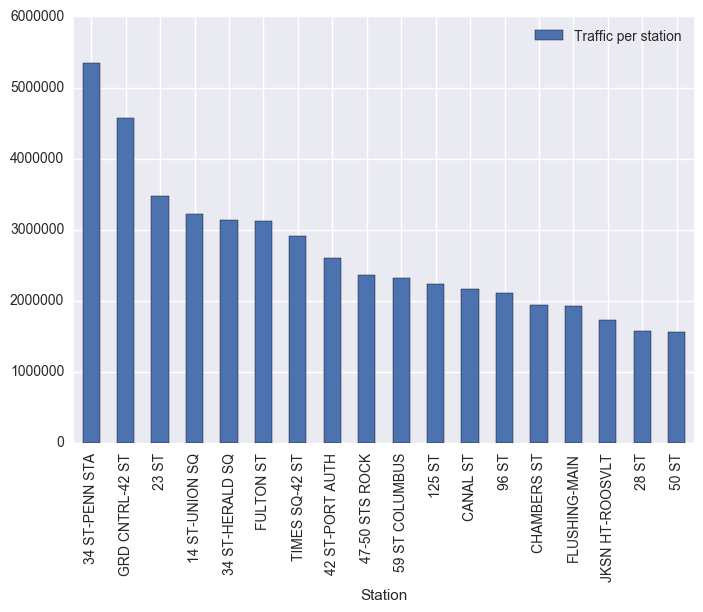

In [38]:
top_20_station_entry_count.plot(kind='bar', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('Station')

> Lets use Seaborn to generate better looking plot

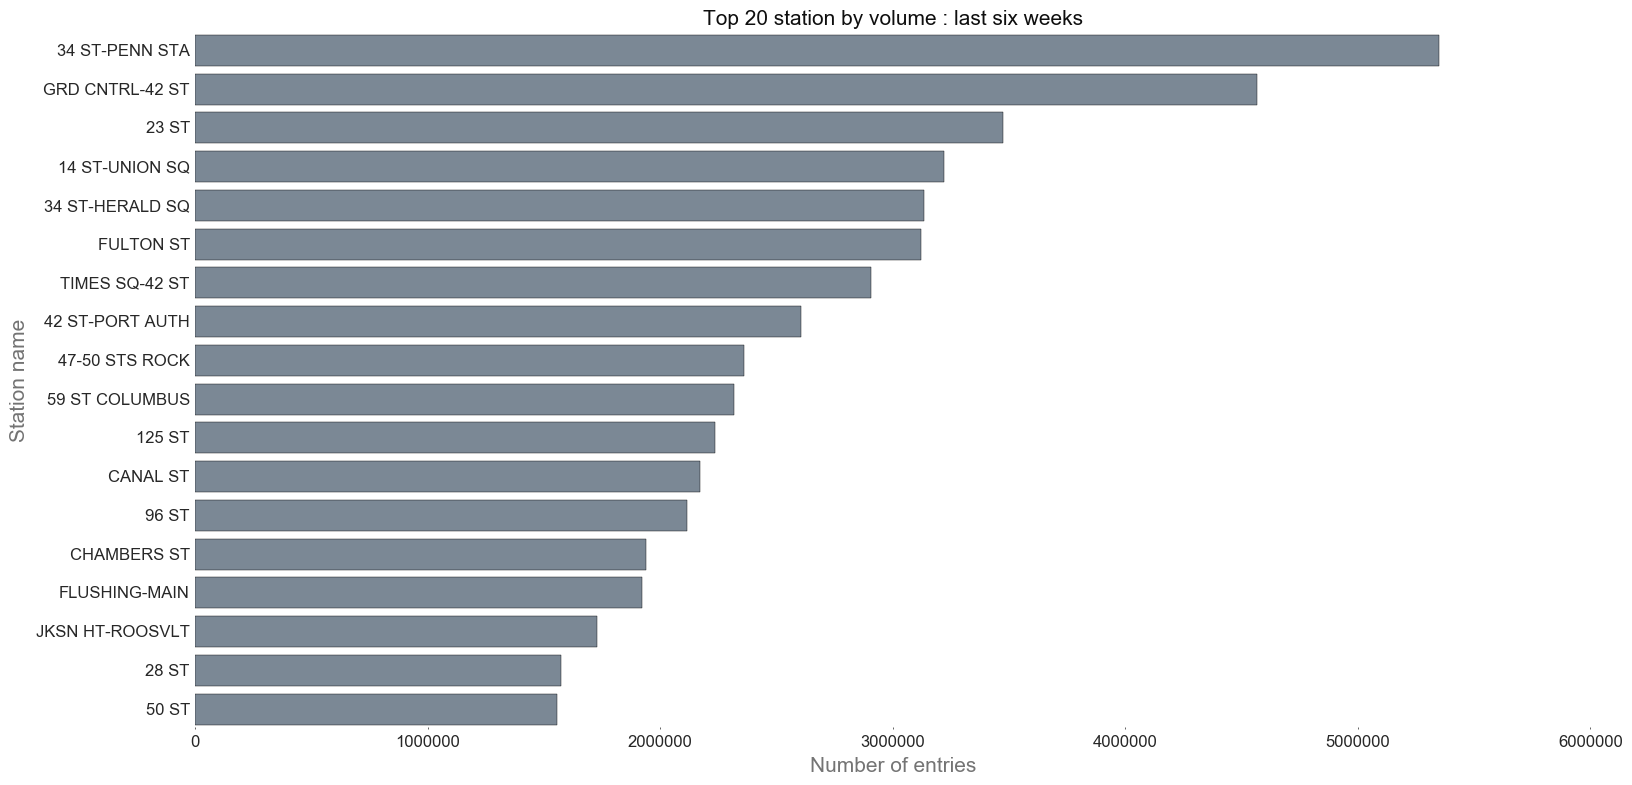

In [39]:
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
sns.reset_orig()
sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 0.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.05'})
#sns.set_context("talk")

f, ax = plt.subplots(figsize=(18, 9))
sns.set(style="whitegrid")
sns.set(font_scale=1)
ax=sns.barplot(y="STATION", x="ENTRIES", data=top_20_station_entry_count,
            label="Total",color='lightslategrey');
sns.despine(left=True, bottom=True,trim=True)
ax.set_title('Top 20 station by volume : last six weeks',fontsize=15)
ax.set_xlabel('Number of entries',fontsize=15)
ax.set_ylabel('Station name',fontsize=15)
plt.savefig('MTN_many_file'+'.'+'png',format='png')
plt.show()
#ax.set_yticks([])

> Convert numeric form of date to a weekday form

In [40]:
df_anal['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_anal.date]

In [34]:
df_anal.head()

,turnstile_id,date,STATION,ENTRIES,day_of_week
0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0,Saturday
1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0,Sunday
2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0,Monday
3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0,Tuesday
4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0,Wednesday


In [35]:
df_ana1 = df_anal.groupby(by=['STATION','day_of_week']).sum()[['ENTRIES']].sort_values('ENTRIES', ascending=False)

In [36]:
df_anal.reset_index(inplace=True)

In [37]:
df_anal.head()

,index,turnstile_id,date,STATION,ENTRIES,day_of_week
0,0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0,Saturday
1,1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0,Sunday
2,2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0,Monday
3,3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0,Tuesday
4,4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0,Wednesday
